In [99]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Estimation of Weights using Linear Regression Formulation

In [100]:
def get_formatted_input(input_, filter_size=11):
    """
    from list of size N to np ndarray of size Nxfilter_size
    """
    m = (filter_size-1)//2
    padded_input = [0]*m+list(input_)+[0]*m #
    formatted_input = []
    for i in range(len(padded_input)-filter_size+1):
        formatted_input.append(padded_input[i:i+filter_size])
    formatted_input = np.asarray(formatted_input)
    return formatted_input

def get_output(input_, filter_, noise_std = 100):
    """
    input_ is list of size N
    filter_ is just a list of len filter_size
    """
    filter_ = np.asarray(filter_).reshape(len(filter_),1)
    output = np.matmul(input_, filter_) #Nx1
    noise = noise_std*np.random.randn(*output.shape)
    return output+noise

def get_estimated_weights(input_, output_):
    """
    O = Xw
    => inv(XT*X)*XT*O = w
    """
    mul = np.matmul(input_.T, input_)
    inv = np.linalg.pinv(mul)
    a = np.matmul(inv, input_.T)
    b = np.matmul(a, output_)
    return b

In [101]:
# input data
input_size = 100
filter_size = 13
input_ = list(np.random.randint(1,10,input_size).astype('float32'))
filter_ = list(np.random.randint(1,10,filter_size).astype('float32'))
noise_std = 20
formatted_input = get_formatted_input(input_, filter_size)
output_ = get_output(formatted_input, filter_, noise_std = noise_std)
print("shape of formatted_input : {}, shape of output : {}".format(formatted_input.shape, output_.shape))

shape of formatted_input : (100, 13), shape of output : (100, 1)


In [102]:
# running the LinReg formulation
estimated_weights_LinReg = get_estimated_weights(formatted_input, output_)
print("estimated_weights_LinReg : {}".format(["{0:.2f}".format(e) for e in estimated_weights_LinReg.squeeze()]))
print("actual weights : {}".format(filter_))

estimated_weights_LinReg : ['7.79', '3.14', '2.39', '5.36', '8.41', '2.66', '7.77', '6.48', '3.51', '3.87', '6.00', '8.27', '7.55']
actual weights : [7.0, 3.0, 3.0, 4.0, 8.0, 3.0, 7.0, 6.0, 5.0, 4.0, 6.0, 9.0, 8.0]


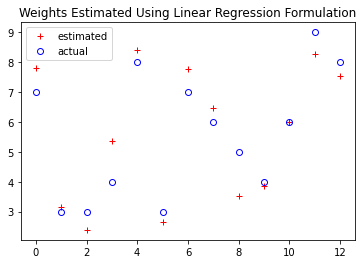

In [103]:
#plotting
plt.plot(estimated_weights_LinReg, 'r+', label="estimated")
plt.plot(filter_,'bo',fillstyle="none",label="actual")
plt.legend()
plt.title("Weights Estimated Using Linear Regression Formulation")
plt.show()

### Estimation Using Least Mean Square Algorithm

In [104]:
def LMSAlgorithm(_desired, _input, filter_size=11, num_epochs=10, lr = 0.001):
    """
    Type of Stochastic Gradient Descent Algorithm
    We update weights using gradient descent obtained for each input.
    W(t+1) = W(t) + lr*error*input  
    """
    formatted_input = get_formatted_input(_input, filter_size)
    N = len(_input)
    c = 0
    estimated_filter = np.random.randint(0,2,filter_size).astype('float64')
    errors = []
    for _ in range(num_epochs):
        e = 0
        for n in range(N):
            input_n = formatted_input[n]
            
            output_n = np.sum(input_n*estimated_filter)
            error_n = _desired[n]-output_n
            e += error_n
            estimated_filter += lr*error_n*input_n        
        errors.append(e)
    return estimated_filter, errors

In [105]:
# running LMS Algo
estimated_weights_LMS,errors_LMS = LMSAlgorithm(list(output_.flatten()), input_, filter_size = filter_size)

In [106]:
print("estimated_weights_LMS : {}".format(["{0:.2f}".format(e) for e in estimated_weights_LMS.squeeze()]))
print("actual weights : {}".format(filter_))

estimated_weights_LMS : ['7.85', '3.44', '2.35', '5.47', '8.60', '3.21', '7.68', '6.33', '3.28', '3.72', '5.80', '8.20', '7.44']
actual weights : [7.0, 3.0, 3.0, 4.0, 8.0, 3.0, 7.0, 6.0, 5.0, 4.0, 6.0, 9.0, 8.0]


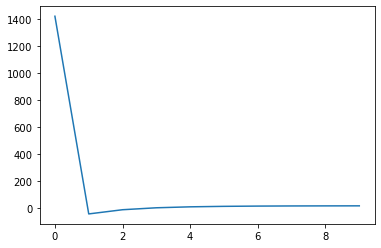

In [108]:
plt.plot(errors_LMS)
plt.show()

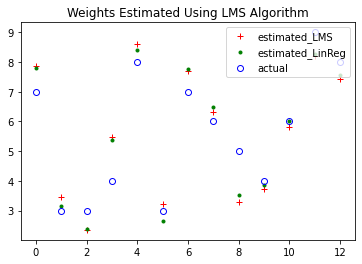

In [107]:
#plotting
plt.plot(estimated_weights_LMS, 'r+', label="estimated_LMS")
plt.plot(estimated_weights_LinReg, 'g.', label="estimated_LinReg")
plt.plot(filter_,'bo',fillstyle="none",label="actual")
plt.legend(loc=1)
plt.title("Weights Estimated Using LMS Algorithm")
plt.show()